In [1]:
from sbi_particle_physics.objects.normalizer import Normalizer
from sbi_particle_physics.managers.backup_manager import BackupManager
from sbi_particle_physics.managers.data_diagnostics import DataDiagnostics
from sbi_particle_physics.config import DATA_DIR

In [2]:
max_files = 5
files = BackupManager.detect_files(DATA_DIR / "data_2")
print(f"#files found {len(files)}")
files = files[:max_files]
raw_data, raw_parameters, _ = BackupManager.load_data(files)
print(raw_data.shape)

#files found 344


Loading files:   0%|          | 0/5 [00:00<?, ?it/s]

torch.Size([2500, 1000, 4])


In [3]:
normalizer = Normalizer.create_normalizer(raw_data)
data = normalizer.normalize_data(raw_data)
parameters = normalizer.normalize_parameters(raw_parameters)

In [4]:
DataDiagnostics.data_unicity(data, parameters)

Parameters unicity rate 0.5712 (normal to be low if many parameters)
Data average unicity rate 0.9954440593719482 (>0.95 needed), data min unicity rate 0.9819999933242798


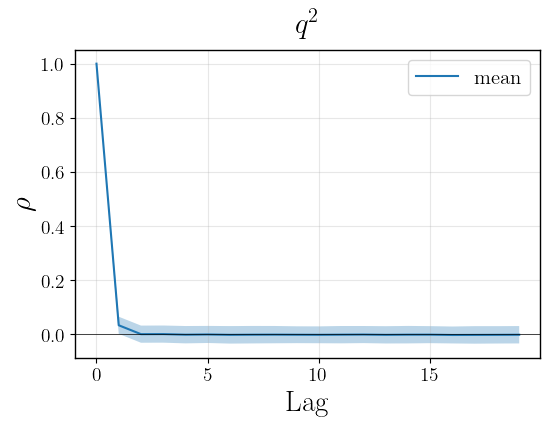

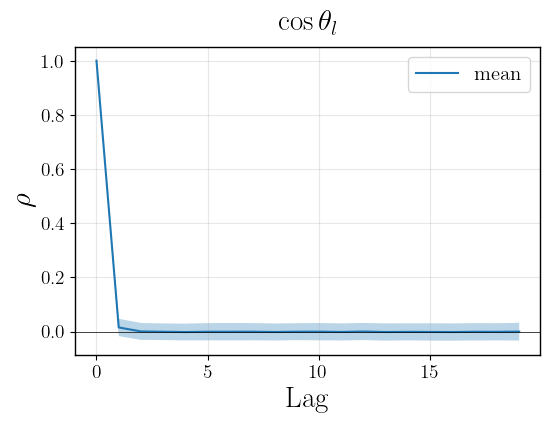

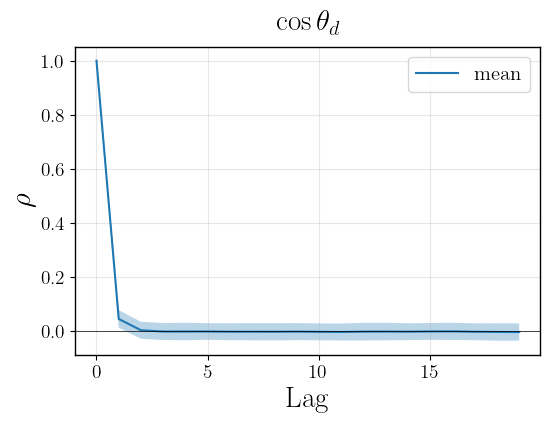

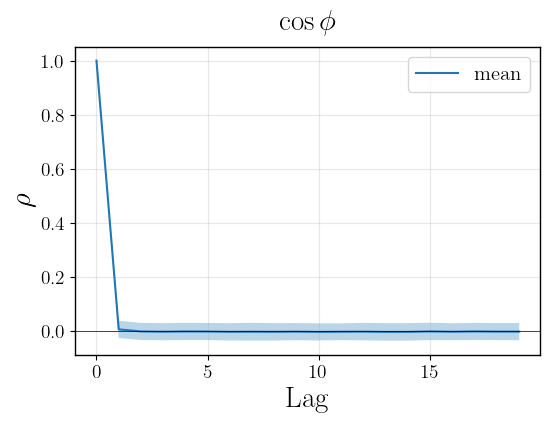

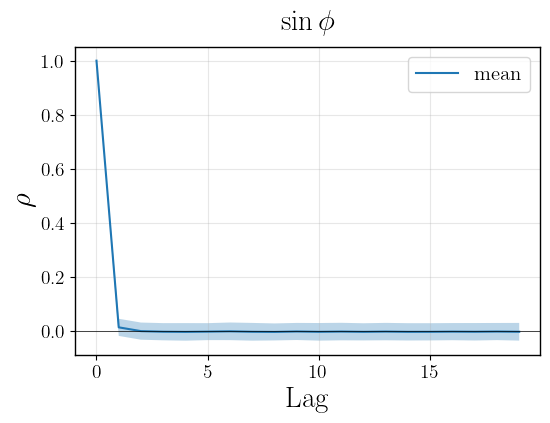

ESS min 1000.0
ESS's [1000.0, 1000.0, 1000.0, 1000.0, 1000.0]
Decorrelation lag [1, 1, 1, 1, 1]


In [5]:
DataDiagnostics.data_autocorrelation(data, lag_zoom=20)